/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 180.9150  
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 193.3963  
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 179.1815 
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 186.9359 
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 192.9053 
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 167.2249 
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 178.9022  
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 183.0441  
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 183.6987  
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 184.3663 
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 183.0756 
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 189.1189 
Epoch 13/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 181.9650 
Epoch 14/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 172.1830 
Epoch 15/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 180.9942 

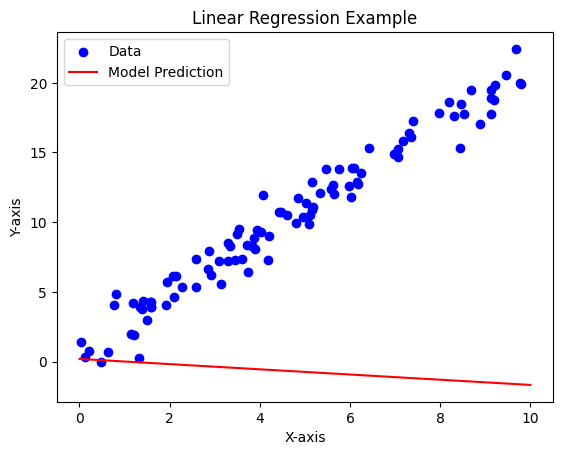

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers

# Create dummy data
x_train = np.random.rand(100, 1) * 10
y_train = 2 * x_train + 1 + np.random.normal(0, 1, (100, 1))

# Build a simple model
model = keras.Sequential([
    layers.Dense(1, input_shape=(1,))
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=50)

# Make predictions
x_test = np.linspace(0, 10, 100)
predictions = model.predict(x_test)

# Plot results
plt.scatter(x_train, y_train, label='Data', color='blue')
plt.plot(x_test, predictions, label='Model Prediction', color='red')
plt.title('Linear Regression Example')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers

# Step 1: Load the Data
# Change 'delimiter' to the appropriate character (e.g., '\t' for tab-separated)
stars_data = pd.read_csv('stars_json.txt', delimiter=' ')  # Adjust the path and delimiter
print(stars_data.head())  # Display the first few rows

# Step 2: Data Preprocessing
# Drop rows with missing values
stars_data.dropna(inplace=True)

# Normalize numerical features
numerical_features = ['distance', 'brightness', 'temperature']  # Adjust as necessary
scaler = StandardScaler()
stars_data[numerical_features] = scaler.fit_transform(stars_data[numerical_features])

# Step 3: Feature Engineering
# Example: Creating a temperature category (optional)
stars_data['temp_category'] = pd.cut(stars_data['temperature'], bins=[0, 3000, 6000, 10000], labels=['Cool', 'Warm', 'Hot'])

# Step 4: Data Splitting
X = stars_data.drop('target_variable', axis=1)  # Replace with your target variable
y = stars_data['target_variable']  # Replace with your target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Model Selection
def create_model(input_shape):
    model = keras.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=input_shape))
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dense(1 if is_regression else len(np.unique(y)), activation='sigmoid' if is_regression else 'softmax'))
    return model

# Step 6: Training the Model
is_regression = True  # Set to False if doing classification
model = create_model((X_train.shape[1],))
model.compile(optimizer='adam', loss='mean_squared_error' if is_regression else 'sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100, validation_split=0.2)

# Step 7: Evaluating the Model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_accuracy}')

# Step 8: Making Predictions
predictions = model.predict(X_test)

# Step 9: Visualization
plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True vs Predicted Values')
plt.axline((0, 0), slope=1, color='red', linestyle='--')  # Reference line
plt.show()

In [17]:
import pandas as pd

# Step 1: Load the Data
stars_df = pd.read_csv('stars_json.txt', delimiter=' ')  # Adjust the path and delimiter

# Step 2: Display the first few rows and column names
print(stars_df.head())
print(stars_df.columns)

# Step 3: Check for missing values
print(stars_df.isnull().sum())

# Step 4: Display basic statistics
print(stars_df.describe())

# Step 5: Visualize some relationships (e.g., scatter plots)
import matplotlib.pyplot as plt

# Example: Scatter plot of 'mag' vs 'dist'
if 'mag' in stars_df.columns and 'dist' in stars_df.columns:
    plt.scatter(stars_df['mag'], stars_df['dist'])
    plt.xlabel('Magnitude')
    plt.ylabel('Distance')
    plt.title('Magnitude vs Distance')
    plt.show()
else:
    print("Columns 'mag' or 'dist' not found in DataFrame.")

Empty DataFrame
Columns: [[{"id":11289,"bf":"21Alp, And","proper":"Alpheratz","ra":0.13976889,"dec":29.09082805,"dist":29.7442,"pmra":135.68,"pmdec":-162.95,"rv":-12,"mag":2.07,"absmag":-0.297,"spect":"B8P","ci":-0.038,"x":25.975,"y":0.951,"z":14.461,"vx":-1.64e-8,"vy":0.0000196,"vz":-0.0000265,"con":"And","_3d":{"textures":{"baseTexture":"/src/assets/textures/alpheratz.jpg","topo":"/src/assets/textures/alpheratz_topo.jpg"},"color":"#9bb0ff"}},{"id":12359,"bf":"11Bet, Cas","proper":"Caph","ra":0.152887,"dec":59.14978,"dist":16.7842,"pmra":523.39,"pmdec":-180.42,"rv":11.3,"mag":2.28,"absmag":1.155,"spect":"F2III-IV","ci":0.38,"x":8.6,"y":0.345,"z":14.41,"vx":0.0000168,"vy":0.0000433,"vz":0.00000239,"con":"Cas","_3d":{"textures":{"baseTexture":"/src/assets/textures/caph.jpg","topo":"/src/assets/textures/caph_topo.jpg"},"color":"#aabfff"}},{"id":17696,"bf":"88Gam, Peg","proper":"Algenib","ra":0.220598,"dec":15.183596,"dist":143.9383,"pmra":0.492,"pmdec":-10.73,"rv":4,"mag":2.83,"absmag":-

In [6]:
import json
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load star data from the provided JSON file
with open('/stars_json.txt', 'r') as file:
    stars_data = json.load(file)

# Extract star positions (x, y, z) to form the point cloud, with error handling for missing keys
star_positions = []
for star in stars_data:
    try:
        if '_3d' in star and all(k in star['_3d'] for k in ['x', 'y', 'z']):
            x, y, z = star['_3d']['x'], star['_3d']['y'], star['_3d']['z']
            star_positions.append((x, y, z))
    except KeyError:
        continue

# Convert positions to numpy array for easier manipulation
star_positions = np.array(star_positions)

# Function to plot the 3D star map
def plot_star_map(star_positions):
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')

    # Scatter plot for stars
    ax.scatter(star_positions[:, 0], star_positions[:, 1], star_positions[:, 2], s=1, color='white')

    # Set plot parameters
    ax.set_title('3D Star Map')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_facecolor('black')
    plt.show()

# Plot the star map using the extracted positions
if len(star_positions) > 0:
    plot_star_map(star_positions)
else:
    print("No valid star positions found in the data.")


No valid star positions found in the data.


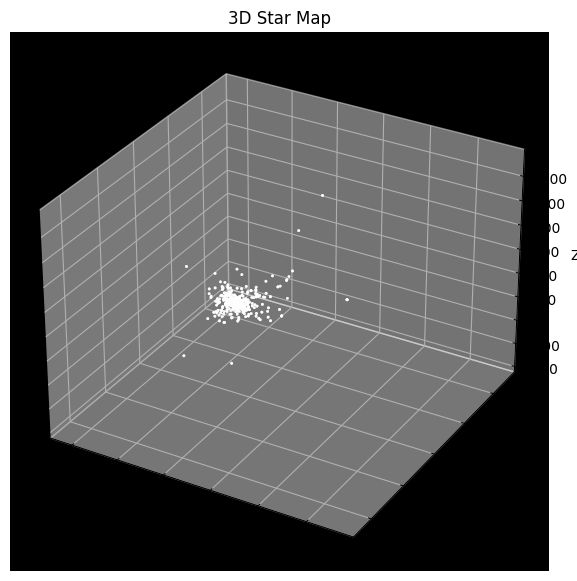

In [9]:
import json
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load star data from the provided JSON file
with open('/stars_json.txt', 'r') as file:
    stars_data = json.load(file)

# Extract star positions (x, y, z) to form the point cloud
star_positions = []
for star in stars_data:
    try:
        # Extract x, y, z coordinates directly from the star object
        if all(k in star for k in ['x', 'y', 'z']):
            x, y, z = star['x'], star['y'], star['z']
            star_positions.append((x, y, z))
    except KeyError:
        continue

# Convert positions to numpy array for easier manipulation
star_positions = np.array(star_positions)

# Function to plot the 3D star map
def plot_star_map(star_positions):
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')

    # Scatter plot for stars
    ax.scatter(star_positions[:, 0], star_positions[:, 1], star_positions[:, 2], s=1, color='white')

    # Set plot parameters
    ax.set_title('3D Star Map')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_facecolor('black')
    plt.show()

# Plot the star map using the extracted positions
if len(star_positions) > 0:
    plot_star_map(star_positions)
else:
    print("No valid star positions found in the data.")


Epoch [0/5000] - D Loss: 1.392455816268921, G Loss: 0.7565215826034546
Epoch [500/5000] - D Loss: 1.2805051803588867, G Loss: 0.7861290574073792
Epoch [1000/5000] - D Loss: 1.3544738292694092, G Loss: 0.9535666704177856
Epoch [1500/5000] - D Loss: 1.3080906867980957, G Loss: 0.8306501507759094
Epoch [2000/5000] - D Loss: 0.8862968683242798, G Loss: 1.376346468925476
Epoch [2500/5000] - D Loss: 1.3639763593673706, G Loss: 0.826313316822052
Epoch [3000/5000] - D Loss: 0.9524611234664917, G Loss: 0.9957597255706787
Epoch [3500/5000] - D Loss: 1.1592774391174316, G Loss: 0.878227174282074
Epoch [4000/5000] - D Loss: 1.1860582828521729, G Loss: 0.8665057420730591
Epoch [4500/5000] - D Loss: 1.3298711776733398, G Loss: 0.8043895959854126


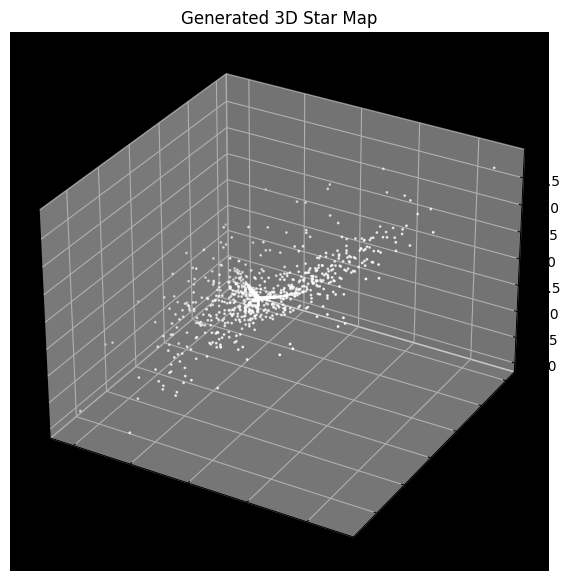

In [10]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import json
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load star data from the provided JSON file
with open('/stars_json.txt', 'r') as file:
    stars_data = json.load(file)

# Extract star positions (x, y, z) to form the point cloud
star_positions = []
for star in stars_data:
    if all(k in star for k in ['x', 'y', 'z']):
        star_positions.append([star['x'], star['y'], star['z']])

# Convert positions to numpy array
star_positions = np.array(star_positions, dtype=np.float32)

# Normalize the data
star_positions = (star_positions - np.mean(star_positions, axis=0)) / np.std(star_positions, axis=0)

# Convert to PyTorch tensor
star_positions = torch.tensor(star_positions)

# Hyperparameters
latent_dim = 100
hidden_dim = 128
output_dim = 3
num_epochs = 5000
batch_size = 64
learning_rate = 0.0002

# Generator model
class Generator(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim * 2),
            nn.ReLU(),
            nn.Linear(hidden_dim * 2, output_dim)
        )

    def forward(self, x):
        return self.model(x)

# Discriminator model
class Discriminator(nn.Module):
    def __init__(self, input_dim, hidden_dim):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, hidden_dim * 2),
            nn.ReLU(),
            nn.Linear(hidden_dim * 2, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)

# Instantiate models
generator = Generator(latent_dim, hidden_dim, output_dim)
discriminator = Discriminator(output_dim, hidden_dim)

# Optimizers
optim_g = optim.Adam(generator.parameters(), lr=learning_rate)
optim_d = optim.Adam(discriminator.parameters(), lr=learning_rate)

# Loss function
criterion = nn.BCELoss()

# Training loop
for epoch in range(num_epochs):
    # Train Discriminator
    real_data = star_positions[torch.randint(0, star_positions.size(0), (batch_size,))]
    real_labels = torch.ones(batch_size, 1)

    latent_space_samples = torch.randn(batch_size, latent_dim)
    fake_data = generator(latent_space_samples)
    fake_labels = torch.zeros(batch_size, 1)

    optim_d.zero_grad()
    real_output = discriminator(real_data)
    real_loss = criterion(real_output, real_labels)

    fake_output = discriminator(fake_data.detach())
    fake_loss = criterion(fake_output, fake_labels)

    d_loss = real_loss + fake_loss
    d_loss.backward()
    optim_d.step()

    # Train Generator
    optim_g.zero_grad()
    fake_output = discriminator(fake_data)
    g_loss = criterion(fake_output, real_labels)  # Trick the discriminator
    g_loss.backward()
    optim_g.step()

    # Print progress
    if epoch % 500 == 0:
        print(f"Epoch [{epoch}/{num_epochs}] - D Loss: {d_loss.item()}, G Loss: {g_loss.item()}")

# Generate synthetic star positions
latent_space_samples = torch.randn(1000, latent_dim)
generated_stars = generator(latent_space_samples).detach().numpy()

# Plot the generated star map
def plot_star_map(star_positions):
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')

    # Scatter plot for stars
    ax.scatter(star_positions[:, 0], star_positions[:, 1], star_positions[:, 2], s=1, color='white')

    # Set plot parameters
    ax.set_title('Generated 3D Star Map')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_facecolor('black')
    plt.show()

# Denormalize the generated data for visualization
generated_stars = generated_stars * np.std(star_positions.numpy(), axis=0) + np.mean(star_positions.numpy(), axis=0)

# Plot the generated stars
plot_star_map(generated_stars)

